<a href="https://colab.research.google.com/github/PeterCapaldi/up_grad_intern/blob/master/UpGrad_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2019-02-27 09:46:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/zip]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K   675KB/s    in 0.8s    

2019-02-27 09:46:52 (675 KB/s) - ‘bank.zip’ saved [579043/579043]



In [0]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [0]:
!ls

bank.csv  bank-full.csv  bank-names.txt  bank.zip  index.html  sample_data


In [0]:
import  pandas  as  pd
import  numpy as  np                  
import seaborn as sns                  
import matplotlib.pyplot as plt 

>>**Using complete data "bank-full.csv" and seeing the classification results. Thereafter we shall work on "bank.csv" to analyse the results with random subset.**

In [0]:
data = pd.read_csv('bank-full.csv',sep=';')

In [0]:
y = data['y']
y = y.replace(['yes','no'],(1,0))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


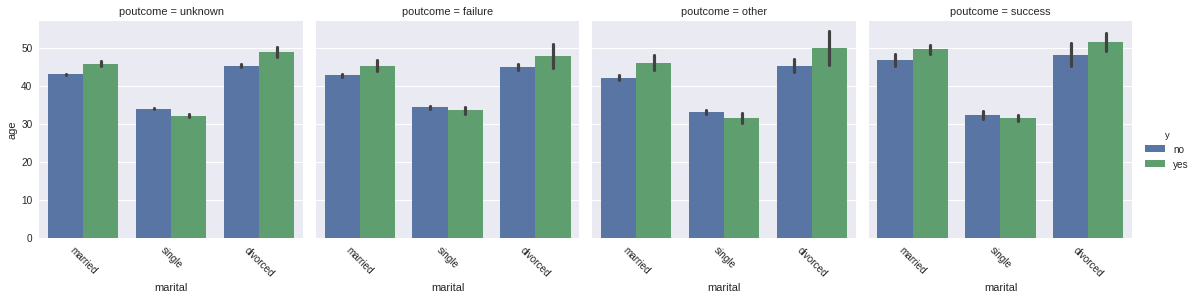

In [0]:
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='poutcome',
                  kind = 'bar')  # Separate by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


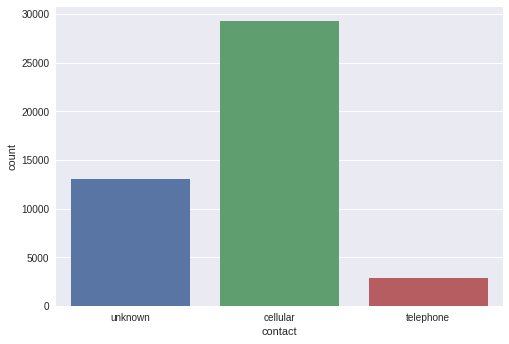

In [0]:
sns.countplot(x='contact', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


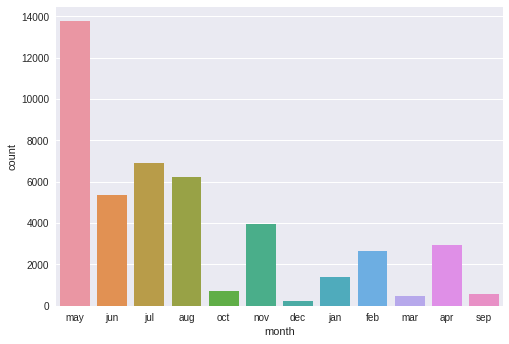

In [0]:

sns.countplot(x='month', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


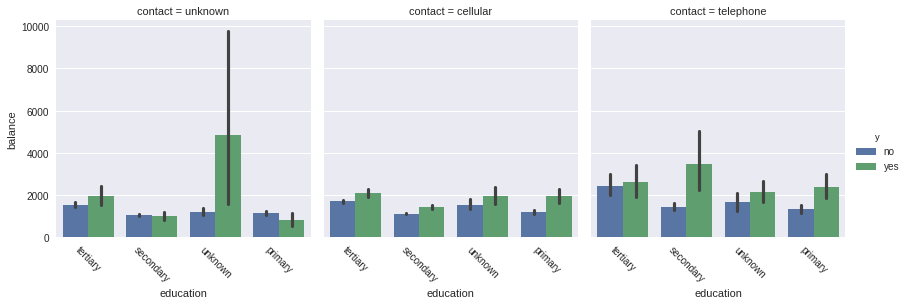

In [0]:
g = sns.factorplot(x='education', 
                   y='balance', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='contact',
                  kind = 'bar')  # Separate by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [0]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [0]:
data = encode_features(data)


In [0]:
X = data.drop(['y'], axis = 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

>>**RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
ranfor = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [0]:
ranfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [0]:
y_pred = ranfor.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:

accuracy_score(y_pred,y_test)


0.9077739688156585

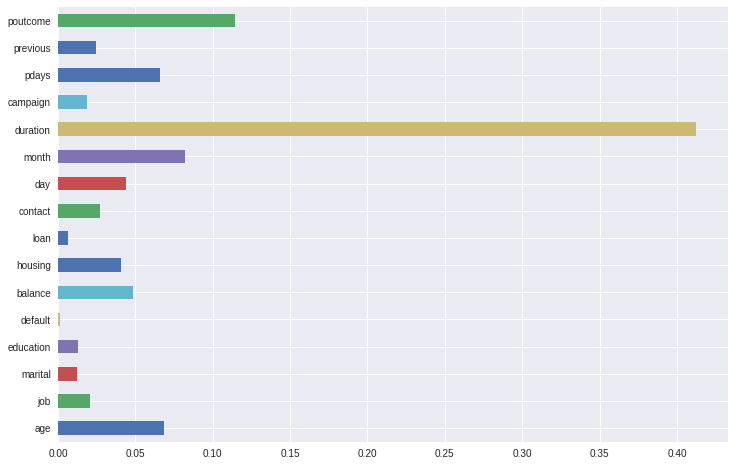

In [0]:
importances=pd.Series(ranfor.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

>>**Logistic Regression**

In [0]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5)

In [0]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score

In [0]:
cnf = confusion_matrix(y_pred,y_test)

In [0]:
cnf

array([[7809,  826],
       [ 173,  235]])

In [0]:
accuracy_score(y_pred,y_test)

0.8895278115669578

>>**MLP Classifier**

In [0]:
from sklearn.neural_network import MLPClassifier


In [0]:
clf = MLPClassifier(alpha=1, hidden_layer_sizes=15)

In [0]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_pred = clf.predict(X_test)

In [0]:
accuracy_score(y_pred,y_test)

0.8627667809355303



---



>> **What happens when we go random instead**

>>Taking random subset instead of the complete data, radom dataset already provided in "bank.csv".

In [0]:
bank_random = pd.read_csv('bank.csv',sep=';')
y_random = bank_random['y']
y_random = y_random.replace(['yes','no'],(1,0))
X_random = bank_random.drop(['y'], axis = 1)
X_random = encode_features(X_random)



>>**MLP Classifier**

In [0]:
y_pred_clf = clf.predict(X_random)
accuracy_score(y_pred_clf,y_random)



0.858438398584384

>>**Logistic Regression**

In [0]:
y_pred_logreg = logreg.predict(X_random)
accuracy_score(y_pred_logreg,y_random)



0.8880778588807786

>>**Random Forest**

In [0]:
y_pred_ranfor = ranfor.predict(X_random)
accuracy_score(y_pred_ranfor,y_random)

0.9267861092678611

In our limited analysis we infer that Random selection may ascertain better predictions with 2/3 models. To analyse the scope in wider context rigorous experimenting is to be done.